# Кодирование категориальных признаков и их полезность



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import preprocessing

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students.csv', delimiter=',')
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          118 non-null    int64  
 1   Growth                       118 non-null    int64  
 2   Shoe size                    118 non-null    int64  
 3   Course number                118 non-null    int64  
 4   Year of birth                118 non-null    int64  
 5   Friend number                118 non-null    int64  
 6   Russian rating               118 non-null    int64  
 7   Maths rating                 118 non-null    int64  
 8   Physics rating               118 non-null    int64  
 9   Computer science rating      118 non-null    int64  
 10  Chemistry rating             118 non-null    int64  
 11  Literature rating            118 non-null    int64  
 12  History rating               118 non-null    int64  
 13  Geography rating    

In [4]:
coder = preprocessing.LabelEncoder()

In [5]:
for name in ['Sex','Coin','Animal','Army','Glasses','Your rating in university',
             'Fastfood','Hostel','Chocolate','Brother-sister','Plane seat','Problems in last semester',
             'Rock paper scissors','Strange people','Your insitute']:
  coder.fit(df[name])
  df[name]=coder.transform(df[name])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          118 non-null    int64  
 1   Growth                       118 non-null    int64  
 2   Shoe size                    118 non-null    int64  
 3   Course number                118 non-null    int64  
 4   Year of birth                118 non-null    int64  
 5   Friend number                118 non-null    int64  
 6   Russian rating               118 non-null    int64  
 7   Maths rating                 118 non-null    int64  
 8   Physics rating               118 non-null    int64  
 9   Computer science rating      118 non-null    int64  
 10  Chemistry rating             118 non-null    int64  
 11  Literature rating            118 non-null    int64  
 12  History rating               118 non-null    int64  
 13  Geography rating    

## Узнаем важность каждого признака в задаче предсказания пола человека

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
selector=ExtraTreesClassifier()
result=selector.fit(df[df.columns], df['Sex'])
result.feature_importances_  

array([0.0047394 , 0.05986919, 0.09203044, 0.00416971, 0.00367549,
       0.00402058, 0.00616557, 0.00494175, 0.00837554, 0.03080202,
       0.00139401, 0.00248264, 0.00596089, 0.00051438, 0.00398379,
       0.002756  , 0.00520299, 0.00432677, 0.00728435, 0.00381078,
       0.00434792, 0.01468049, 0.00614778, 0.44476459, 0.00749701,
       0.01549606, 0.00286746, 0.00280836, 0.00376045, 0.00226215,
       0.00172448, 0.00270163, 0.00342304, 0.00687167, 0.1046853 ,
       0.00180118, 0.06579096, 0.00285048, 0.00394031, 0.00534955,
       0.00402281, 0.00259604, 0.00710473, 0.00318335, 0.00492045,
       0.00253994, 0.01118434, 0.00417116])

In [ ]:
features_table= pd.DataFrame(result.feature_importances_, index =df.columns,
                                              columns =['importance'])
print(features_table)

                             importance
Age                            0.004739
Growth                         0.059869
Shoe size                      0.092030
Course number                  0.004170
Year of birth                  0.003675
Friend number                  0.004021
Russian rating                 0.006166
Maths rating                   0.004942
Physics rating                 0.008376
Computer science rating        0.030802
Chemistry rating               0.001394
Literature rating              0.002483
History rating                 0.005961
Geography rating               0.000514
Biology rating                 0.003984
Foreign language rating        0.002756
Social science rating          0.005203
Distance to home km            0.004327
Minutes to first class         0.007284
Children number                0.003811
Removed teeth                  0.004348
Weight                         0.014680
Glasses                        0.006148
Sex                            0.444765


In [ ]:
features_table.sort_values(by='importance', ascending=False)

,importance
Sex,0.444765
Army,0.104685
Shoe size,0.092030
Hair length,0.065791
Growth,0.059869
Computer science rating,0.030802
Coin,0.015496
Weight,0.014680
Middle and ring finger,0.011184
Physics rating,0.008376


А далее нужно оставить лишь несколько признаков из топа по значимости и по ним тренировать модель

Допустим мы хотим оставить 7 признаков: 

Army	0.092844

Shoe size	0.090263

Hair length	0.063735

Growth	0.063282

Coin	0.034178

Computer science rating	0.022314

Weight 0.012210

Давайте заново загрузим данные, так как мы меняли значения в категориальных столбцах

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv', delimiter=',')
df_cut=df[['Army','Shoe size', 'Hair length', 'Growth', 'Coin', 'Computer science rating', 'Weight','Sex']]
df_cut=df_cut.dropna()
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 185
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Army                     157 non-null    object 
 1   Shoe size                157 non-null    int64  
 2   Hair length              157 non-null    float64
 3   Growth                   157 non-null    int64  
 4   Coin                     157 non-null    object 
 5   Computer science rating  157 non-null    int64  
 6   Weight                   157 non-null    float64
 7   Sex                      157 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 11.0+ KB


In [ ]:
df_cut=pd.get_dummies(df_cut,drop_first=True)
df_cut.head()

,Shoe size,Hair length,Growth,Computer science rating,Weight,Army_не призовут (по разным причинам),Coin_Решка,Sex_мужской
0,40,50.0,170,84,64.0,1,0,0
1,43,7.0,191,72,73.0,1,0,1
2,41,4.0,172,0,60.0,0,1,1
3,38,20.0,168,0,59.0,1,1,0
4,36,55.0,159,0,57.0,1,0,0


Гипотеза: угадать пол человека можно за небольшое количество вопросов. И модель эти вопросы найдет автоматически.

In [ ]:
model=tree.DecisionTreeClassifier(max_depth=3)
model.fit(df_cut[['Army_не призовут (по разным причинам)','Shoe size', 'Hair length', 'Growth', 'Coin_Решка', 'Computer science rating', 'Weight']].values.reshape(-1,7), y=df_cut['Sex_мужской'].values)

DecisionTreeClassifier(max_depth=3)

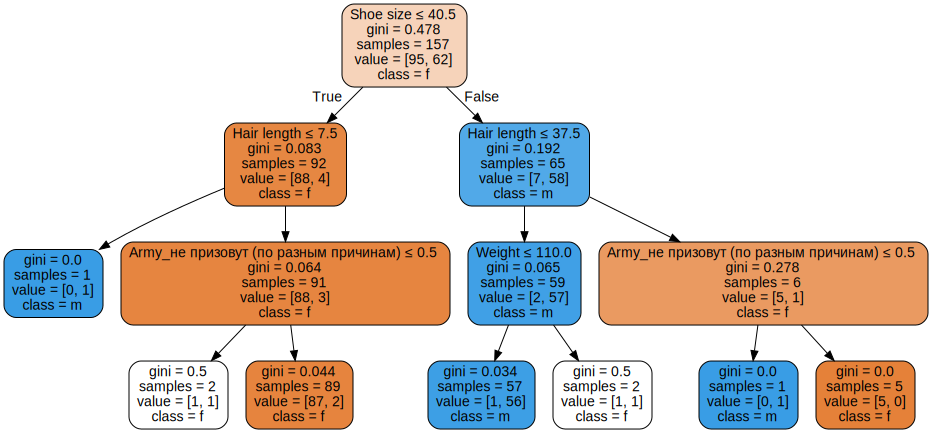

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=['Army_не призовут (по разным причинам)','Shoe size', 'Hair length', 'Growth', 'Coin_Решка', 'Computer science rating', 'Weight'],  
                      class_names=['f', 'm'],  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Загружаем тестовую выбоку

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_cut_test=df_test[['Army','Shoe size', 'Hair length', 'Growth', 'Coin', 'Computer science rating', 'Weight','Sex']]
df_cut_test=df_cut_test.dropna()

In [ ]:
df_cut_test=pd.get_dummies(df_cut_test,drop_first=True)
df_cut_test.head()

,Shoe size,Hair length,Growth,Computer science rating,Weight,Army_не призовут (по разным причинам),Coin_Решка,Sex_мужской
0,44.0,1.2,180.0,88,78.0,1,0,1
1,38.0,30.0,167.0,0,50.0,1,0,0
2,41.0,50.0,178.0,0,70.0,1,0,0
3,35.0,20.0,156.0,0,47.0,1,0,0
4,44.0,8.0,186.0,0,94.0,0,0,1


Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [ ]:
df_cut_test['Predicted']=model.predict(df_cut_test[['Army_не призовут (по разным причинам)','Shoe size', 'Hair length', 'Growth', 'Coin_Решка', 'Computer science rating', 'Weight']].values.reshape(-1,7))

Метрики качества задачи классификации

In [ ]:
pd.crosstab(df_cut_test['Predicted'],df_cut_test['Sex_мужской'])

Sex_мужской,0,1
Predicted,,
0,46,1
1,1,29


In [7]:
from sklearn.ensemble import ExtraTreesClassifier
selector=ExtraTreesClassifier()
result=selector.fit(df[df.columns], df['Your insitute'])
result.feature_importances_  

array([0.01333843, 0.01561392, 0.01639868, 0.01079513, 0.00940752,
       0.01913138, 0.01391548, 0.05592161, 0.01086577, 0.0791143 ,
       0.00832913, 0.03114808, 0.05020635, 0.01082337, 0.01454932,
       0.02134821, 0.05171055, 0.01345299, 0.00800159, 0.0128861 ,
       0.00880953, 0.01345159, 0.00910885, 0.01211881, 0.00769771,
       0.01265365, 0.01173198, 0.00882988, 0.01032067, 0.00556957,
       0.01076081, 0.01406362, 0.0177064 , 0.01308717, 0.00808445,
       0.00596251, 0.0139044 , 0.01265205, 0.01396886, 0.0153406 ,
       0.01190386, 0.01516649, 0.22993243, 0.00962368, 0.01205701,
       0.01007171, 0.01087444, 0.00758936])

In [8]:
features_table= pd.DataFrame(result.feature_importances_, index =df.columns,
                                              columns =['importance'])
print(features_table)

                             importance
Age                            0.013338
Growth                         0.015614
Shoe size                      0.016399
Course number                  0.010795
Year of birth                  0.009408
Friend number                  0.019131
Russian rating                 0.013915
Maths rating                   0.055922
Physics rating                 0.010866
Computer science rating        0.079114
Chemistry rating               0.008329
Literature rating              0.031148
History rating                 0.050206
Geography rating               0.010823
Biology rating                 0.014549
Foreign language rating        0.021348
Social science rating          0.051711
Distance to home km            0.013453
Minutes to first class         0.008002
Children number                0.012886
Removed teeth                  0.008810
Weight                         0.013452
Glasses                        0.009109
Sex                            0.012119


In [9]:
features_table.sort_values(by='importance', ascending=False)

,importance
Your insitute,0.229932
Computer science rating,0.079114
Maths rating,0.055922
Social science rating,0.051711
History rating,0.050206
Literature rating,0.031148
Foreign language rating,0.021348
Friend number,0.019131
Width of 5000 mm,0.017706
Shoe size,0.016399
